# **Laboratorio N°5: Número de Condición**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

In [3]:
A = np.array([[1,2],[3,4]])
B = np.array([[2,4],[6,1]])

def n_cond(A):
    return np.linalg.cond(A)

cond_A = n_cond(A)
cond_B = n_cond(B)

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [4]:
suma_cond = cond_A + cond_B
print(suma_cond)
cond_suma = np.linalg.cond(A + B)
print(cond_suma)
cond_suma == suma_cond

17.052019416022606
3.593515872786416


np.False_

**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [5]:
resta_cond = cond_A - cond_B
print(resta_cond)
cond_resta = n_cond(A - B)
print(cond_resta)
resta_cond == cond_suma

12.81404933129593
2.0732122812931304


np.False_

**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [6]:
mult_cond = cond_A * cond_B
print(mult_cond)
cond_mult = n_cond(A @ B)
print(cond_mult)
mult_cond == cond_mult

31.642876474881568
31.513722337202495


np.False_

## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [2]:

def matriz_A(n):
    A = np.eye(n) * 1/n
    A[0][n-1] = n**2
    A[n-1][0] = 1
    return A

matriz_A(5)

array([[ 0.2,  0. ,  0. ,  0. , 25. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.2,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0.2]])

In [3]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

In [4]:
def matriz_H(n):
    A = np.ones((n,n))
    rows, cols= A.shape
    
    for i in range(rows):
        for j in range(cols):
            A[i][j] = 1 / (1 + i + j)
    
    return A

matriz_H(3)

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]])

**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

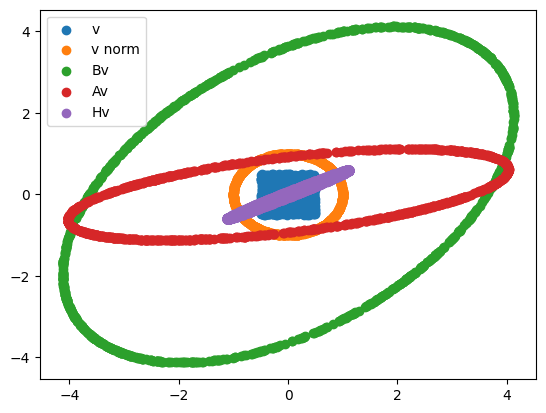

In [6]:
def normalizar(V):
    norms = np.linalg.norm(V, axis=0)  # Norma de cada columna
    return V / norms

B = matriz_B(2)
V = np.random.rand(2, 1000) - 0.5
V_norm = normalizar(V)
BV = B @ V_norm
AV = matriz_A(2) @ V_norm
HV = matriz_H(2) @ V_norm
plt.scatter(V[0], V[1], label = "v")
plt.scatter(V_norm[0], V_norm[1], label = "v norm")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.scatter(AV[0], AV[1], label = "Av")
plt.scatter(HV[0], HV[1], label = "Hv")
plt.legend()

**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [15]:
def nro_cond(M):
  return np.linalg.cond(M, 2)

def vector_condicion(M, N):
  cond = []
  for i in range(1,N+1):
    M_n = M[:i,:i]
    cond.append(nro_cond(M_n))
  return cond

N = 5
M = matriz_B(N)

vector_condicion(M,N)

[np.float64(1.0),
 np.float64(1.6666666666666672),
 np.float64(2.0938363213560542),
 np.float64(2.358570173636288),
 np.float64(2.527415881580846)]

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


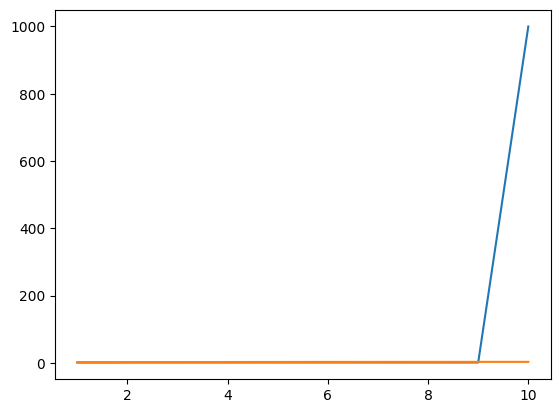

In [18]:
M = matriz_A(10)

x= [x for x in range(1,11)]
A_y= vector_condicion(M,10)
B_y = vector_condicion(matriz_B(10), 10)
H_y = vector_condicion(matriz_H(10), 10)

plt.plot(x, A_y)
plt.plot(x, B_y)
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [ ]:
#COMPLETAR

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [ ]:
#COMPLETAR

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR